# 日経平均 ダウ 為替

In [2]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices

In [3]:
dowj = pl.read_csv('../../data/dow_daily_usd.csv')
dowj = dowj.with_columns([pl.col('date').cast(pl.Date)])
nikkei = pl.read_csv('../../data/nikkei_from19850104.csv')
nikkei = nikkei.with_columns([pl.col('date').cast(pl.Date)])
exchange_rate = pl.read_csv('../../data/usd_jpy_rate.csv')
exchange_rate = exchange_rate.with_columns([pl.col('date').cast(pl.Date)])

df = dowj.join(nikkei, on='date', how='inner').join(exchange_rate, on='date', how='inner')
df = df.select(
    pl.col('date'), pl.col('dowj').log(), pl.col('nikkei').log(), pl.col('usd_jpy_rate').log()
)
df.head()

date,dowj,nikkei,usd_jpy_rate
date,f64,f64,f64
1985-01-04,7.077464,9.355138,5.531609
1985-01-07,7.082204,9.356648,5.539694
1985-01-08,7.083136,9.365615,5.53635
1985-01-09,7.092358,9.372763,5.541264
1985-01-10,7.109471,9.377919,5.535758


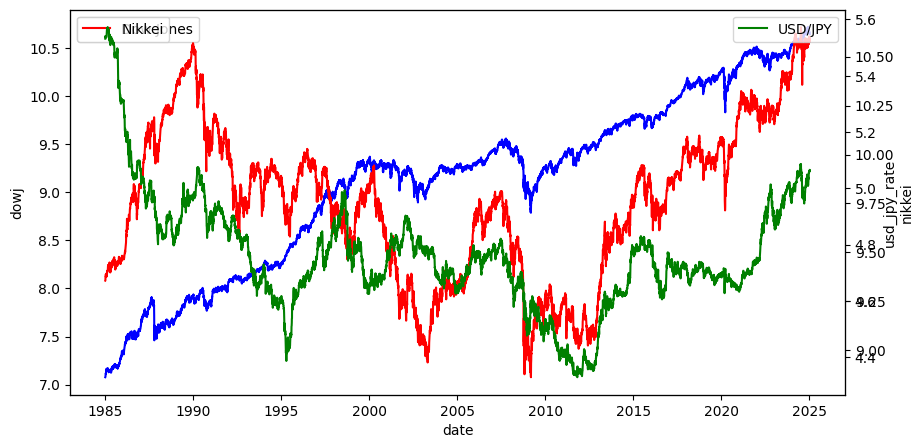

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df.to_pandas(), x='date', y='dowj', ax=ax, color='blue', label='Dow Jones')
sns.lineplot(data=df.to_pandas(), x='date', y='nikkei', ax=ax.twinx(), color='red', label='Nikkei')
sns.lineplot(data=df.to_pandas(), x='date', y='usd_jpy_rate', ax=ax.twinx(), color='green', label='USD/JPY')
ax.legend()

In [5]:
nikkei = df['nikkei'].to_numpy()
dowj = df['dowj'].to_numpy()
exchange_rate = df['usd_jpy_rate'].to_numpy()
trend = np.arange(len(nikkei))
y, X = dmatrices('nikkei ~ dowj + exchange_rate + trend', return_type='dataframe')
model = sm.OLS(y, X)
result = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 nikkei   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     337.6
Date:                Fri, 17 Jan 2025   Prob (F-statistic):          2.43e-208
Time:                        15:31:29   Log-Likelihood:                -3337.2
No. Observations:                9516   AIC:                             6682.
Df Residuals:                    9512   BIC:                             6711.
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.8203      0.211     18.124